In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
base_cur = "ETH"
month = 11
year = 2020
day = 29

In [ ]:
def get_coin_margined_filename(base_cur, year : int, month : int, day : int) :
    next_month = month + 1
    if next_month == 13 :
        next_month = 1
        next_year = year + 1
    else :
        next_year = year
    return base_cur +  "USD_PERP_T_DEPTH_" + str(year) + str(month) 
+ " 29_" + str(next_year) + str(next_month) + "29" + EOSUSD_PERP_T_DEPTH_2020-11-29.tar.gz

In [3]:
def process(df) :
# #     df["time"] = df["time"] * 1000 * 1000
    df["time"] = pd.to_datetime(df['time'], unit='ms')
#     df["time"] = pd.to_datetime(df["time"])
    processed = df.groupby(pd.Grouper(key='time',freq='10s')).agg({"price": np.mean, "qty": np.sum})
    processed.reset_index(inplace = True)
    return processed.ffill()

In [4]:
quarterly_btc = pd.read_csv(base_cur + "USDT_210625-trades-2021-" + month +".zip", usecols = [0,1,2,4], names = ["tradeId", "price",  "qty",   "time"], index_col = 0)
perpetual_btc = pd.read_csv(base_cur +  "USDT-trades-2021-" + month +".zip", usecols = [0,1,2,4], names = ["tradeId", "price",  "qty",   "time"], index_col = 0)


/home/corvin/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
perpetual_btc

,price,qty,time
tradeId,,,
225809031,1923.06,24.664,1617235201105
225809032,1923.04,0.600,1617235201105
225809033,1922.97,0.003,1617235201105
225809034,1922.96,1.000,1617235201105
225809035,1922.87,0.584,1617235201105
...,...,...,...
253420970,2337.98,2.731,1619205086258
253420971,2337.98,4.173,1619205086794
253420972,2337.98,0.056,1619205086819


In [6]:
processed_quarterly = process(quarterly_btc)
processed_perpetual = process(perpetual_btc)

In [7]:
processed_perpetual

,time,price,qty
0,2021-04-01 00:00:00,1925.444042,2262.695
1,2021-04-01 00:00:10,1928.952816,2396.964
2,2021-04-01 00:00:20,1931.210744,1984.516
3,2021-04-01 00:00:30,1931.519133,948.547
4,2021-04-01 00:00:40,1934.327497,2113.357
...,...,...,...
196984,2021-04-23 19:10:40,2334.368885,679.501
196985,2021-04-23 19:10:50,2335.214895,491.557
196986,2021-04-23 19:11:00,2336.654021,359.152
196987,2021-04-23 19:11:10,2337.588000,283.608


In [8]:
processed_perpetual = processed_perpetual[processed_perpetual['time'] >= processed_quarterly["time"][0]]
processed_perpetual.reset_index(inplace=True)


In [9]:
processed_quarterly

,time,price,qty
0,2021-04-01 00:00:00,2089.986667,0.037
1,2021-04-01 00:00:10,2095.147143,7.943
2,2021-04-01 00:00:20,2098.380000,1.908
3,2021-04-01 00:00:30,2098.380000,0.000
4,2021-04-01 00:00:40,2101.307500,2.041
...,...,...,...
197445,2021-04-23 20:27:30,2439.845000,0.420
197446,2021-04-23 20:27:40,2439.710000,0.067
197447,2021-04-23 20:27:50,2439.710000,0.000
197448,2021-04-23 20:28:00,2439.710000,0.000


In [10]:
processed_perpetual

,index,time,price,qty
0,0,2021-04-01 00:00:00,1925.444042,2262.695
1,1,2021-04-01 00:00:10,1928.952816,2396.964
2,2,2021-04-01 00:00:20,1931.210744,1984.516
3,3,2021-04-01 00:00:30,1931.519133,948.547
4,4,2021-04-01 00:00:40,1934.327497,2113.357
...,...,...,...,...
196984,196984,2021-04-23 19:10:40,2334.368885,679.501
196985,196985,2021-04-23 19:10:50,2335.214895,491.557
196986,196986,2021-04-23 19:11:00,2336.654021,359.152
196987,196987,2021-04-23 19:11:10,2337.588000,283.608


In [11]:
diff = ((processed_quarterly["price"] / processed_perpetual["price"]) - 1) * 100

In [12]:
diff.tail()

197445   NaN
197446   NaN
197447   NaN
197448   NaN
197449   NaN
Name: price, dtype: float64

In [13]:
diff_frame = pd.DataFrame({"time" : processed_quarterly["time"], "percentage" :  ((processed_quarterly["price"] / processed_perpetual["price"]) - 1) * 100})

In [14]:
dd = diff_frame.groupby(pd.Grouper(key='time',freq='min')).agg({"percentage": [np.mean, np.median]})
dd.reset_index(inplace = True)

In [15]:
ddd = diff_frame.groupby(pd.Grouper(key='time',freq='min')).agg({"percentage": np.mean})
ddd.reset_index(inplace = True)

In [16]:
ddd

,time,percentage
0,2021-04-01 00:00:00,8.620723
1,2021-04-01 00:01:00,8.630866
2,2021-04-01 00:02:00,8.616364
3,2021-04-01 00:03:00,8.588996
4,2021-04-01 00:04:00,8.609344
...,...,...
32904,2021-04-23 20:24:00,NaN
32905,2021-04-23 20:25:00,NaN
32906,2021-04-23 20:26:00,NaN
32907,2021-04-23 20:27:00,NaN


<AxesSubplot:xlabel='time', ylabel='percentage'>

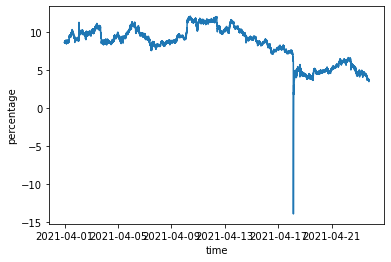

In [17]:
sns.lineplot(data=ddd, x="time", y="percentage")